# Описание проекта


Интернет-магазин «Стримчик», продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# Структура проекта
1. [Изучение данных](#start)

2. [Предобработка данных](#preprocessing)

    * [Переименование столбцов](#rename)
    * [Обработка пропущенных значений](#null)
    * [Замена типа данных](#type)
    * [Добавление расчетов](#calculation)
    
    
3. [Исследовательский анализ данных](#analysis)

    * [Года выпуска игр](#year)
    * [Продажи по платформам](#platforms)
    * [Продажи по платформам в актуальное время](#relevant)
    * [Boxplot по глобальным продажам игр  по платформам](#boxplot)
    * [Влияние на продажи отзывы пользователей и критиков](#reviews)
    * [Продажи игр на других платформах](#other)
    * [Общее распределение игр по жанрам](#genres)
    * [Портрет пользователя по регионам](#regions)   
    
    
4. [Проверка гипотез](#hypothesis)

5. [Вывод](#conclusion)


# Шаг 1. Изучение данных
<a id="start"></a>

На данном этапе откроем файл с данными, посмотрим несколько строк таблицы и изучим общую информацию о типах данных, пропущенных значениях, названиях столбцов.

Импортируем для начала основные библиотеки.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


Прочитаем таблицу games.

In [13]:
df = pd.read_csv('games.csv')

Изучим первые пятнадцать строк таблицы.

In [14]:
df.head(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [125]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,no_rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,no_rating,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1.0,no_rating,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1,-1.0,no_rating,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,no_rating,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1,-1.0,no_rating,0.01


In [127]:
len(df['name'].unique())

11560

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Изучим общую информацию.

In [15]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


# Вывод

- Названия столбцов в верхнем регистре. Нужно привести названия к нижнему регистру.
- В столбцах `Name`, `Genre`, `Critic_Score`, `Year_of_Release`,`User_Score`, `Rating` есть пропущенные значения. Необходимо обработать пропуски. 
- Столбцы `Year_of_Release` и `Critic_Score` типа данных float нужно преобразовать к типу данных int.

Приступим к подготовке данных. 

# Шаг 2. Предобработка данных
<a id="preprocessing"></a>

Подготовим данные:
- переименуем столбцы
- заполним пропуски
- приведем данные к нужным типам

## 2.1. Переименование столбцов
<a id="rename"></a>

Приведем названия столбцов к нижнему регистру.

In [16]:
df.columns = df.columns.str.lower()

Проверим название столбцов.

In [17]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Теперь все в порядке.

## 2.2. Обработка пропущенных значений
<a id="null"></a>

Посмотрим на кол-во пропусков в процентом соотношении.

In [7]:
games.isna().mean()*100

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         40.089740
rating             40.478612
dtype: float64

Большое кол-во пропусков в столбцах `сritic_Score`, `user_Score`, `rating`. В остальных столбцах меньше 2 %.

Изучим сначала строки с минимальными пропусками. В столбцах `genre` и `name`.

In [19]:
df[df['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Пропуски оказались в одних и тех же строках.

In [20]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Можно удалить строки или заменить на 'Unknown', чтобы не терять данные. Выберем второй вариант.

In [24]:
df['name'] = df['name'].fillna('Unknown')

In [25]:
df['genre'] = df['genre'].fillna('Unknown')

В столбце `year_of_release` заменим значения на маску -2222. 

In [26]:
df['year_of_release'] = df['year_of_release'].fillna('2222')

Проверим значения в столбце `user_score`.

In [27]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Cреди численных значений встречается аббревиатура 'tbd'. Аббревиатура расшифровывается - To Be Determined, то есть "Будет определено". Посчитаем их кол-во.

In [29]:
df[df['user_score'] == 'tbd']['user_score'].count()

2424

Заменим значение пока на nan, т.к. значение не определено.

In [31]:
df.loc[df['user_score'] == 'tbd','user_score'] = np.nan

Преобразуем столбец к типу float, чтобы вычесть корреляцию.

In [33]:
df['user_score'] = df.user_score.astype('float')

Посмотрим матрицу корреляции.

In [34]:
df.corr()

,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
na_sales,1.000000,0.765335,0.449594,0.638649,0.240755,0.086200
eu_sales,0.765335,1.000000,0.435061,0.722792,0.220752,0.055337
jp_sales,0.449594,0.435061,1.000000,0.291089,0.152593,0.125598
other_sales,0.638649,0.722792,0.291089,1.000000,0.198554,0.057119
critic_score,0.240755,0.220752,0.152593,0.198554,1.000000,0.580878
user_score,0.086200,0.055337,0.125598,0.057119,0.580878,1.000000


Корреляция между `user_score` и `critic_score` высокая, но в данных столбцах много пропусков и эти пропуски совпадают. С остальными столбцами корреляция низкая, поэтому заменим пропущенные значения на маску, например -1. В стобце `rating` на no_rating. 

In [35]:
df['user_score'] = df['user_score'].fillna(-1)
df['critic_score'] = df['critic_score'].fillna(-1)
df['rating'] = df['rating'].fillna('no_rating')

Посчитаем кол-во пропусков снова.

In [36]:
df.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

## 2.3. Приведение типов данных
<a id="type"></a>

Посмотрим на таблицу.

In [37]:
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,no_rating
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,no_rating
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,-1.0,-1.0,no_rating
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,-1.0,-1.0,no_rating


Проверим общую информацию.

In [38]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Хоть в столбце `year_of_release` отображается целое число. Тип данных стал object. Необходимо привести его к типу int.

In [39]:
df['year_of_release'] = df['year_of_release'].astype('int')

Также поступим и с столбцом `critic_score`.

In [40]:
df['critic_score'] = df['critic_score'].astype('int')

## 2.4. Добавление расчетов
<a id="calculation"></a>

Посчитаем суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [41]:
df['total_sales'] = df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']

Проверим наличие нового столбца.

In [43]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,no_rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,no_rating,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1.0,no_rating,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1,-1.0,no_rating,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,no_rating,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1,-1.0,no_rating,0.01


# Вывод

Данные подготовлены:
- привели столбцы к нижнему регистру
- заполнили пропуски
- преобразовали данные к нужным типам
- посчитали суммарные продажи во всех регионах.

# Шаг 3. Исследовательский анализ данных
<a id="analysis"></a>

На данном этапе:
- Посмотрим, сколько игр выпускалось в разные годы. 
- Рассмотрим, как менялись продажи по платформам.
- Возьмем данные за соответствующий актуальный период.
- Определим rакие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.
- Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.
- Разберем, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.
- Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.
- Соотнесем выводы с продажами игр на других платформах.
- Посмотрим на общее распределение игр по жанрам. 

## 3.1. Годы выпуска игр
<a id="year"></a>

Посмотрим, сколько игр выпускалось в разные годы. Пропущенные данные учитывать не будем.

In [46]:
games_data = df[df['year_of_release']!=2222]

Построим гистограмму.

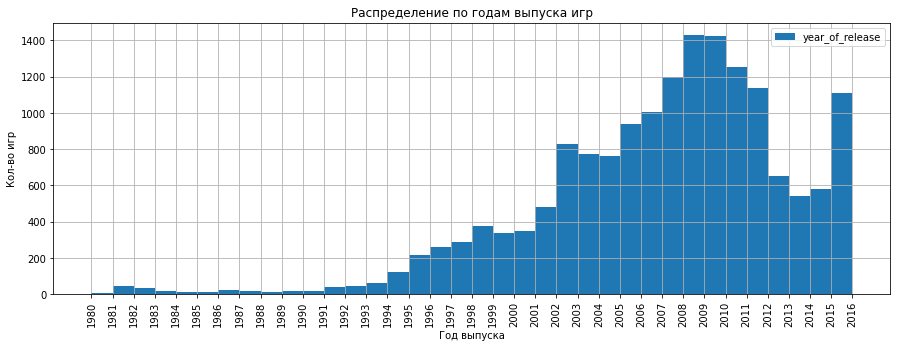

In [45]:
games_data['year_of_release'].plot(kind='hist', bins=36,grid=True,figsize=(15, 5)).legend()
plt.xticks(np.arange(1980,2017,1),rotation=90)
plt.title('Распределение по годам выпуска игр')
plt.ylabel('Кол-во игр')
plt.xlabel('Год выпуска')
plt.show()

По графику видно, что 
- с 1980 по 1994 год игровая индустрия почти не развивалась
- c 1995 года началось постепенное увеличение выпущенных игр
- на 2009-2010 годы приходится пик выпуска игр, далее игровая индустрия сбавила обороты
- в 2016 году наблюдается заметный прирост выпущенных игр, по сравнению с  2012-2015 годами
- данные за 2016 год могут быть неполными

## 3.2. Продажи по платформам
<a id="platforms"></a>


Cделаем сводную таблицу с итоговым продажам по платформам.

In [118]:
platform_sales = games_data.pivot_table(index='platform', values='total_sales').sort_values(by='total_sales',ascending=False)

Изучим топовые платформы.

In [119]:
platform_sales.head()

,total_sales
platform,
GB,2.622990
NES,2.561735
GEN,1.061034
SNES,0.836987
PS4,0.801378


Посмотрим таблицу с продажами игр на платформе GB.

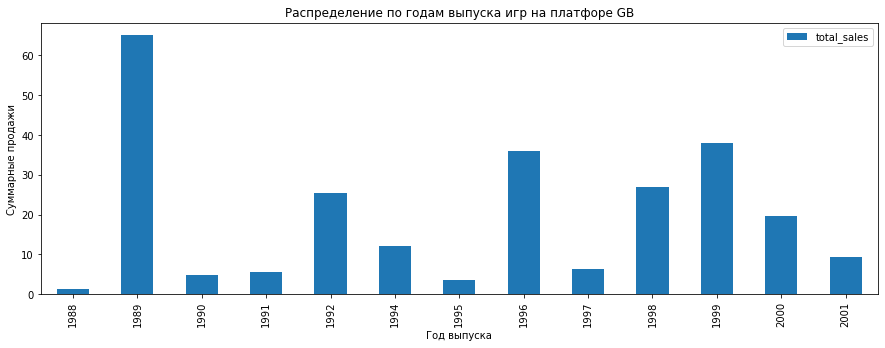

In [73]:
df[(df['platform'] == 'GB')&(df['year_of_release']!=2222)].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar', figsize=(15,5))
plt.title('Распределение по годам выпуска игр на платфоре GB')
plt.ylabel('Суммарные продажи')
plt.xlabel('Год выпуска')
plt.show()

По графику видно, что
- продажи игр на платформе GB начались в 1988 году
- в 1989 году был пик продаж игр 
- после 2001 года продажи закончились
- платформа выпускала игры 13 лет

Посмотрим таблицу с продажами игр на платформе NES.

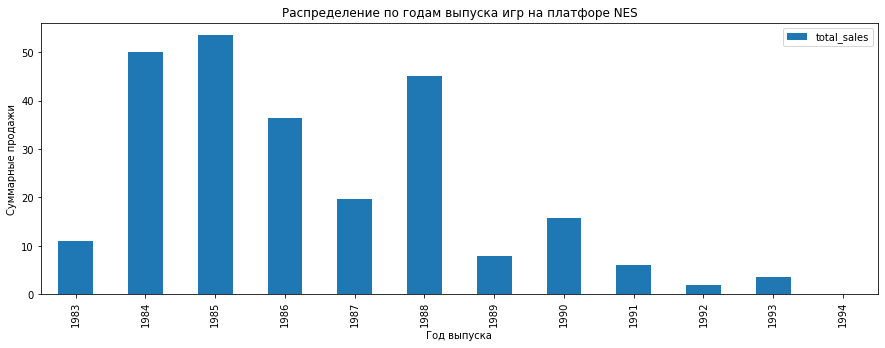

In [51]:
df[(df['platform'] == 'NES')&(df['year_of_release']!=2222)].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar', figsize=(15,5))
plt.title('Распределение по годам выпуска игр на платфоре NES')
plt.ylabel('Суммарные продажи')
plt.xlabel('Год выпуска')
plt.show()

По графику видно, что
- продажи игр на платформе NES начались в 1983 году
- в 1985 году был пик продаж игр 
- после 1994 года продажи закончились
- платформа продержалась на рынке 12 лет

Посмотрим таблицу с продажами игр на платформе GEN.

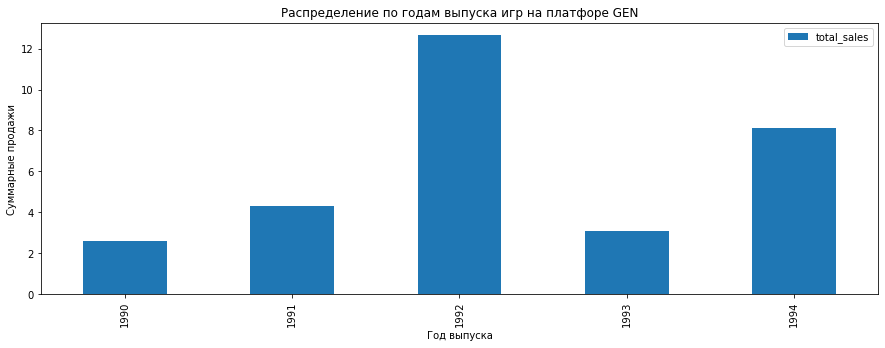

In [52]:
df[(df['platform'] == 'GEN')&(df['year_of_release']!=2222)].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar', figsize=(15,5))
plt.title('Распределение по годам выпуска игр на платфоре GEN')
plt.ylabel('Суммарные продажи')
plt.xlabel('Год выпуска')
plt.show()

По графику видно, что
- продажи игр на платформе GEN начались в 1990 году
- в 1992 году был пик продаж игр
- после 1994 года продажи заверишились
- платформа продержалась на рынке недолго, всего 5 лет

Построим гистограмму с продажами игр на платформе SNES.

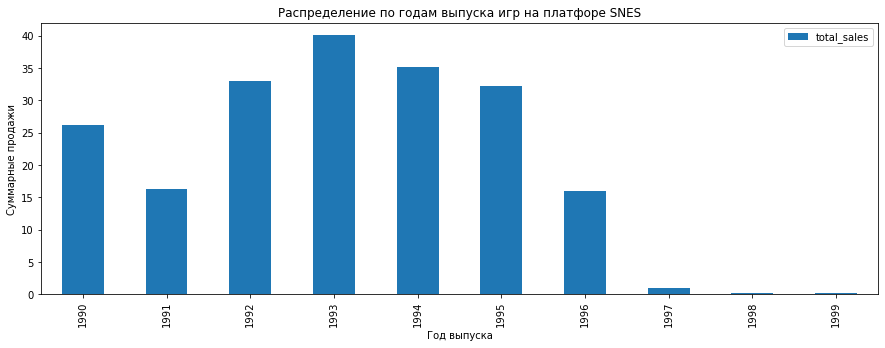

In [54]:
df[(df['platform'] == 'SNES')&(df['year_of_release']!=2222)].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar', figsize=(15,5))
plt.title('Распределение по годам выпуска игр на платфоре SNES')
plt.ylabel('Суммарные продажи')
plt.xlabel('Год выпуска')
plt.show()

По графику видно, что
- продажи игр на платформе SNES начались в 1990 году
- в 1993 году был пик продаж игр, затем продажи то увеличивались, то уменьшались
- после 1999 года продажи заверишились.
- латформа продержалась на рынке 10 лет.

Построим гистограмму с продажами игр на платформе PS4.

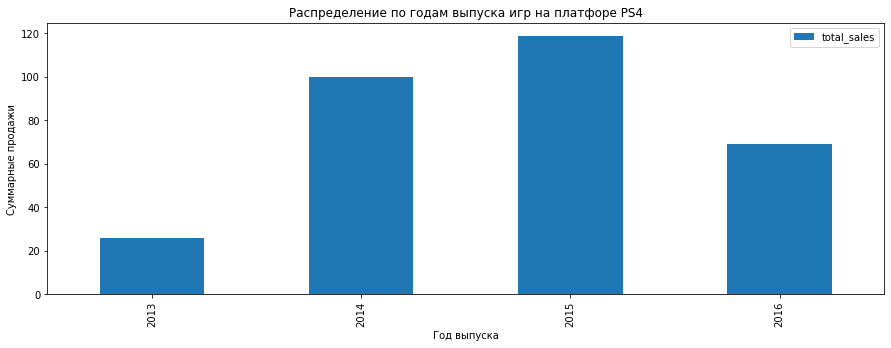

In [55]:
df[(df['platform'] == 'PS4')&(df['year_of_release']!=2222)].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar', figsize=(15,5))
plt.title('Распределение по годам выпуска игр на платфоре PS4')
plt.ylabel('Суммарные продажи')
plt.xlabel('Год выпуска')
plt.show()

По графику видно, что 
- в 2015 году был пик продаж, но это неточно, т.к данные за 2016 год могут быть неполными.
- платформа находится на рынке 4 года (с 2013 по 2016 год).
- вероятно, что в 2017 год будут продажи игр.

По данным графиков продаж популярных платформ сделаем вывод, что 
- средний срок жизнедеятельности платформы 9 лет. 
- в 2017 году вероятнее всего будут продажи игр PS4 

## 3.3.  Лидеры платформ по продажам в актуальное время
<a id="relevant"></a>

Возьмем данные за соответствующий актуальный период с 2014 по 2016 год, т.к. игры - динамично меняющаяся индустрия. Также отсечем из данных значение - 2222.

In [77]:
actual_games = df[(df['year_of_release']>=2014)&(df['year_of_release']<2221)]

Создадим сводную таблицу по платформам и их итоговым продажам.

In [78]:
platform_actual = actual_games.pivot_table(index='platform', values='total_sales').sort_values(by='total_sales',ascending=False)

Посмотрим список из 5 топовых платформ по продажам.

In [123]:
top5 = platform_actual.head(5)
top5

,total_sales
platform,
PS4,0.766356
XOne,0.615614
WiiU,0.588767
Wii,0.460909
X360,0.434414


Платформа PS4 лидирует по продажам в настоящее время. Рассмотрим график продаж игр платформы PS4.

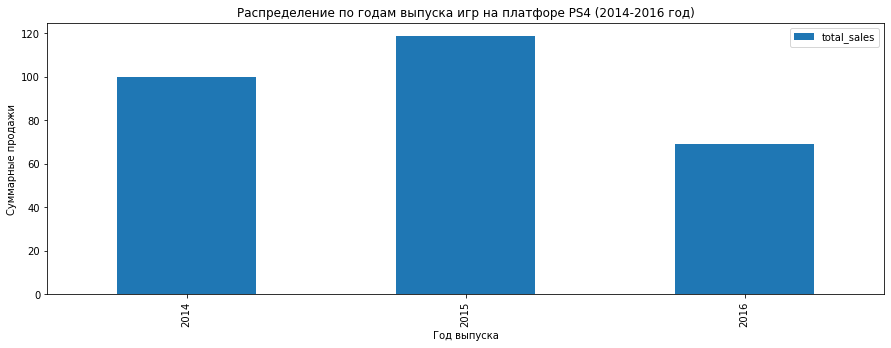

In [80]:
actual_games[actual_games['platform'] == 'PS4'].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar', figsize=(15,5))
plt.title('Распределение по годам выпуска игр на платфоре PS4 (2014-2016 год)')
plt.ylabel('Суммарные продажи')
plt.xlabel('Год выпуска')
plt.show()

По графику видно, что 
- в 2015 году был пик продаж игр на платформе PS4
- в 2016 году продаж было меньше, чем за 2015 год, но в описании проекта есть информация, что данные за 2016 год могут быть неполными. 
- платформа PS4 - вполне перспективная платформа для продаж игр в 2017 году.

Рассмотрим график продаж игр платформы XOne.

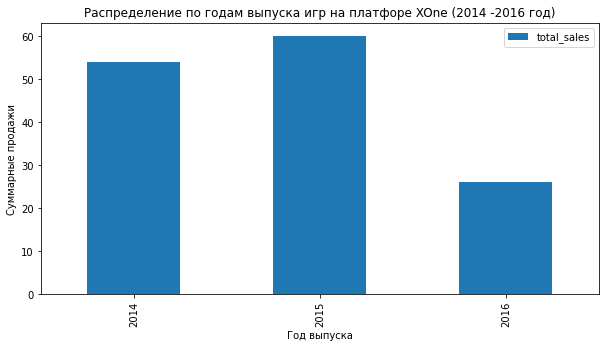

In [81]:
actual_games[actual_games['platform'] == 'XOne'].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar', figsize=(10,5))
plt.title('Распределение по годам выпуска игр на платфоре XOne (2014 -2016 год)')
plt.ylabel('Суммарные продажи')
plt.xlabel('Год выпуска')
plt.show()

По графику видно, что 
- в 2015 году был пик продаж игр на платформе XOne
- в 2016 году, судя по данным продаж меньше, чем за 2015 год, но в описании проекта есть информация, что данные за 2016 год могут быть неполными. 
- платформа XOne - вполне перспективная платформа для продаж игр в 2017 году.

Рассмотрим график продаж игр платформы WiiU.

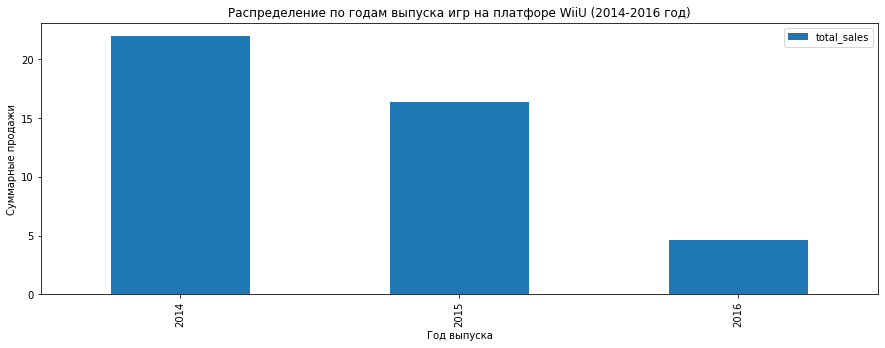

In [82]:
actual_games[actual_games['platform'] == 'WiiU'].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar', figsize=(15,5))
plt.title('Распределение по годам выпуска игр на платфоре WiiU (2014-2016 год)')
plt.ylabel('Суммарные продажи')
plt.xlabel('Год выпуска')
plt.show()

По графику видно, что 
- в 2014 году был пик продаж на платформе WiiU
- в 2015 году продаж стало меньше, по сравнению с 2014 годом.
- в 2016 году продаж еще меньше, но в описании проекта есть информация, что данные за 2016 год могут быть неполными.
- платформа WiiU - неперспективная платформа для продаж игр в 2017 году. Это связано с выходом более новых и перспективных платформ.

Рассмотрим график продаж игр платформы 3DS.

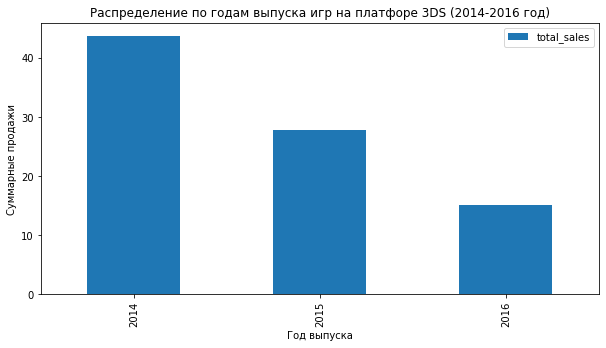

In [83]:
actual_games[actual_games['platform'] == '3DS'].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar', figsize=(10,5))
plt.title('Распределение по годам выпуска игр на платфоре 3DS (2014-2016 год)')
plt.ylabel('Суммарные продажи')
plt.xlabel('Год выпуска')
plt.show()

По графику видно, что 
- в 2014 году был пик продаж игр на платформе 3DS.
- в 2015 году продаж стало меньше, по сравнению с 2014 годом.
- в 2016 году продаж еще меньше, но в описании проекта есть информация, что данные за 2016 год могут быть неполными.
- платформа 3DS - неперспективная платформа для продаж игр в 2017 году. Это связано с выходом более новых и перспективных платформ.

Рассмотрим график продаж игр платформы X360.

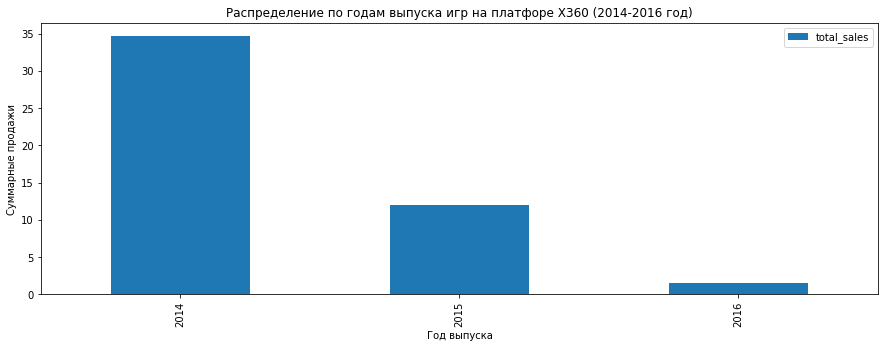

In [124]:
actual_games[actual_games['platform'] == 'X360'].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar', figsize=(15,5))
plt.title('Распределение по годам выпуска игр на платфоре X360 (2014-2016 год)')
plt.ylabel('Суммарные продажи')
plt.xlabel('Год выпуска')
plt.show()

По графику видно, что 
- в 2014 году был пик продаж игр на платформе X360. 
- в 2015 году продаж стало значительно меньше, по сравнению с 2014 годом. 
- в 2016 году продаж почти нет, но в описании проекта есть информация, что данные за 2016 год могут быть неполными.
- платформа X360 - неперспективная платформа для продаж игр в 2017 году. Это связано с выходом более новых и перспективных платформ.

## 3.4. Boxplot по глобальным продажам игр  по платформам.
<a id="boxplot"></a>


Отфильтруем данные для 5 топовых платформ актуального периода.

In [84]:
platform_top5_data = actual_games[(actual_games['platform']=='X360')|(actual_games['platform']=='PS4')|(actual_games['platform']=='3DS')|(actual_games['platform']=='XOne')|(actual_games['platform']=='WiiU')]

Построим график  «Ящик с усами» по глобальным продажам игр  по платформам.

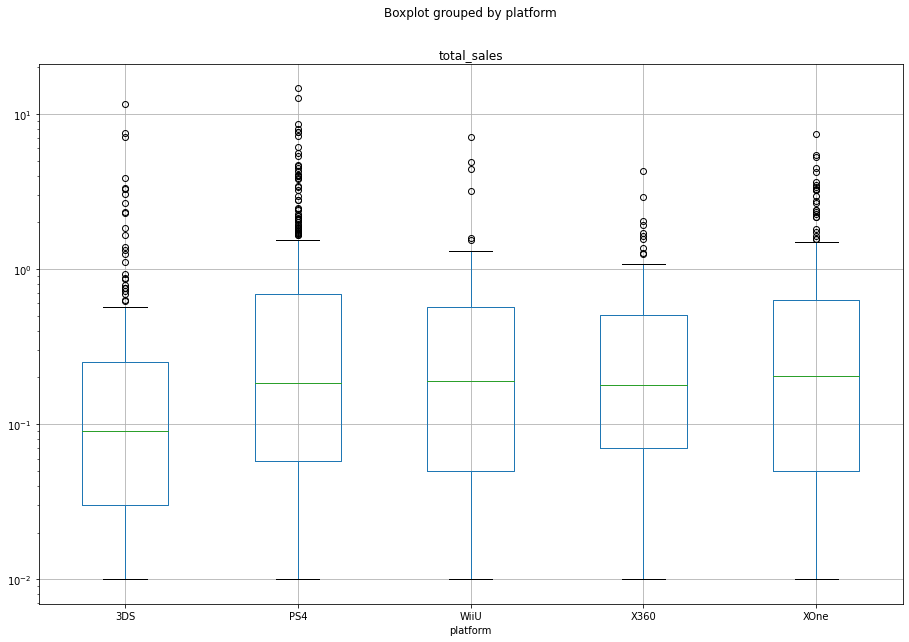

In [85]:
ax = platform_top5_data.boxplot('total_sales', by='platform', figsize=(15, 10))
ax.set_yscale('log')

По графику видно, что 
- Верхний квартиль у платформ X360, PS4 больше всех и находится примерно на одном уровне. Верхний квартиль чуть меньше у платформы у WiiU и X360. Меньше всегов верхний квартиль у платформы 3DS.
- Нижний квартиль у платформы X360 больше всех. Далее чуть меньше квартиль у PS4, затем WiiU и Xone. Самый минимальный нижний квартиль у платформы 3DS.
- Самый большой межквартильный размах у XOne, затем PS4, WiiU и 3DS, cамый маленький из топовых платформ у X360. 
- Наибольшее значение медианы y XOne, далее примерно на одном уровне PS4, WiiU, X360. Cамое наименьшая медиана у платформы 3DS. 
- Cамое минимальное значение у 3DS, затем примерно на одном уровне чуть больше у WiiU и XOne, далее PS4 и у X360 минимально значение больше всех топовых платформ.
- Самое максимальное значение y PS4, затем чуть меньше XOne и WiiU, далее X360 и наименьшее значение у 3DS. 
- Cамое большое число выбросов у платформы PS4 и 3DS, меньше всего у WiiU и X360.

## 3.5. Влияние на продажи отзывы пользователей и критиков
<a id="reviews"></a>


Рассмотрим влияние отзывов на продажи. Данные без оценок не будем рассматривать.

In [102]:
actual_score = actual_games[(actual_games['user_score']!=-1)&(actual_games['critic_score']!=-1)]

На примере популярной платформы PS4.

In [103]:
PS4 = actual_score[actual_score['platform']=='PS4']

Построим диаграмму рассеяния пользовательских оценок от всех продаж.

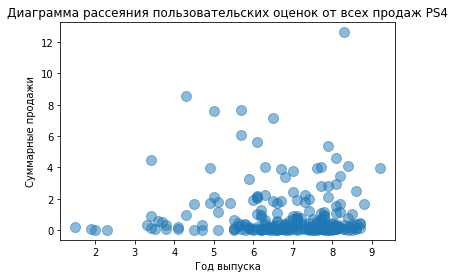

In [104]:
plt.scatter(PS4['user_score'], PS4['total_sales'], alpha=0.5, s=100, marker="o")
plt.title('Диаграмма рассеяния пользовательских оценок от всех продаж PS4')
plt.ylabel('Суммарные продажи')
plt.xlabel('Год выпуска')
plt.show()

По графику заметно, что нет прямой зависимости от оценок пользователей и продажами игр.

Корреляция низкая, отрицательная.

In [105]:
print(PS4['user_score'].corr(PS4['total_sales']))

-0.04318585997193634


Построим диаграму рассеяния оценок критиков от всех продаж.

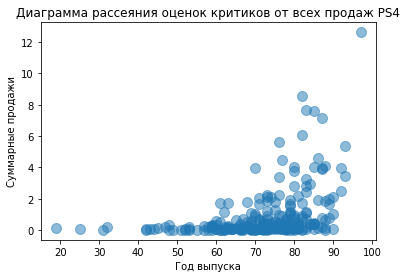

In [106]:
plt.scatter(PS4['critic_score'], PS4['total_sales'], alpha=0.5, s=100, marker="o")
plt.title('Диаграмма рассеяния оценок критиков от всех продаж PS4')
plt.ylabel('Суммарные продажи')
plt.xlabel('Год выпуска')
plt.show()

На графике видно, что есть небольшая зависимость от оценок критиков и продажами игр.

In [107]:
print(PS4['critic_score'].corr(PS4['total_sales']))

0.40190287811475334


## 3.6. Продажи игр на других платформах
<a id="other"></a>


Рассмотрим влияние отзывов на продажи среди 5 популярных платформ. 

In [108]:
X360 = actual_score[actual_score['platform']=='X360']

In [109]:
DS3 = actual_score[actual_score['platform']=='3DS']

In [110]:
XOne = actual_score[actual_score['platform']=='XOne']

In [111]:
WiiU = actual_score[actual_score['platform']=='WiiU']

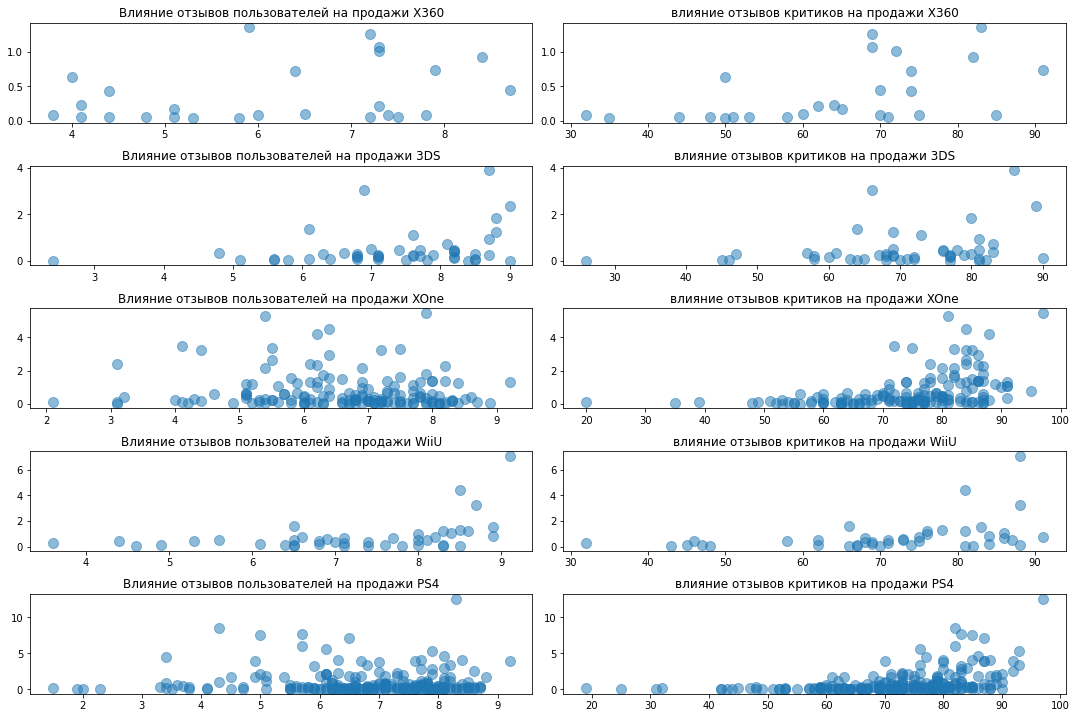

In [112]:
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8),(ax9,ax10)) = plt.subplots(nrows=5, ncols=2, figsize=(15, 10))
title = "Normal title"
ax1.scatter(X360['user_score'], X360['total_sales'], alpha=0.5, s=100, marker="o")

ax2.scatter(X360['critic_score'], X360['total_sales'], alpha=0.5, s=100, marker="o")

ax3.scatter(DS3['user_score'], DS3['total_sales'], alpha=0.5, s=100, marker="o")

ax4.scatter(DS3['critic_score'], DS3['total_sales'], alpha=0.5, s=100, marker="o")

ax5.scatter(XOne['user_score'], XOne['total_sales'], alpha=0.5, s=100, marker="o")

ax6.scatter(XOne['critic_score'], XOne['total_sales'], alpha=0.5, s=100, marker="o")

ax7.scatter(WiiU['user_score'], WiiU['total_sales'], alpha=0.5, s=100, marker="o")

ax8.scatter(WiiU['critic_score'], WiiU['total_sales'], alpha=0.5, s=100, marker="o")

ax9.scatter(PS4['user_score'], PS4['total_sales'], alpha=0.5, s=100, marker="o")

ax10.scatter(PS4['critic_score'], PS4['total_sales'], alpha=0.5, s=100, marker="o")

ax1.set_title('Влияние отзывов пользователей на продажи X360')
ax2.set_title('влияние отзывов критиков на продажи X360')
ax3.set_title('Влияние отзывов пользователей на продажи 3DS')
ax4.set_title('влияние отзывов критиков на продажи 3DS')
ax5.set_title('Влияние отзывов пользователей на продажи XOne')
ax6.set_title('влияние отзывов критиков на продажи XOne')
ax7.set_title('Влияние отзывов пользователей на продажи WiiU')
ax8.set_title('влияние отзывов критиков на продажи WiiU')
ax9.set_title('Влияние отзывов пользователей на продажи PS4')
ax10.set_title('влияние отзывов критиков на продажи PS4')
plt.tight_layout(pad=0.8, w_pad=0.8, h_pad=1.0)
plt.show()


Посчитаем корреляцию отзывов пользователей и критиков для самых популярных платформ.

In [113]:
X360cor_user = X360['user_score'].corr(X360['total_sales'])
print(f'Корреляция пользовательских оценок X360: {X360cor_user}','\n')
X360cor_critic = X360['critic_score'].corr(X360['total_sales'])
print(f'Корреляция оценок критиков X360: {X360cor_critic}','\n')
DS3cor_user = DS3['user_score'].corr(DS3['total_sales'])
print(f'Корреляция пользовательских оценок 3DS: {DS3cor_user}','\n')
DS3cor_critic = DS3['critic_score'].corr(DS3['total_sales'])
print(f'Корреляция оценок критиков 3DS: {DS3cor_critic}','\n')
XOnecor_user = XOne['user_score'].corr(XOne['total_sales'])
print(f'Корреляция пользовательских оценок XOne: {XOnecor_user}','\n')
XOnecor_critic = XOne['critic_score'].corr(XOne['total_sales'])
print(f'Корреляция оценок критиков XOne: {XOnecor_critic}','\n')
WiiUcor_user = WiiU['user_score'].corr(WiiU['total_sales'])
print(f'Корреляция пользовательских оценок Wii: {WiiUcor_user}','\n')
WiiUcor_critic = WiiU['critic_score'].corr(WiiU['total_sales'])
print(f'Корреляция оценок критиков Wii: {WiiUcor_critic}','\n')

Корреляция пользовательских оценок X360: 0.33651362483599345 

Корреляция оценок критиков X360: 0.5257228356581523 

Корреляция пользовательских оценок 3DS: 0.2798498792503281 

Корреляция оценок критиков 3DS: 0.28468579095782925 

Корреляция пользовательских оценок XOne: -0.0917343450331075 

Корреляция оценок критиков XOne: 0.42211185105557647 

Корреляция пользовательских оценок Wii: 0.4114513876908575 

Корреляция оценок критиков Wii: 0.3756402218389979 



- корреляция между оценками критиков и пользователей на продажи присутствует, но она небольшая
- у платформы WiiU корреляция пользовательских оценок выше, по сравнению с корреляцией оценок критиков
- у остальных платформ наоборот корреляция оценок критиков выше, по сравнению с пользовательскими оценками
- корреляция пользовательских оценок XOne отрицательная, т.е. есть небольшая тенденция, чем ниже оценка пользователя, тем больше продаж

## 3.7. Общее распределение игр по жанрам.
<a id="genres"></a>

Рассмотрим общее распределение игр по жанрам за актуальный период.

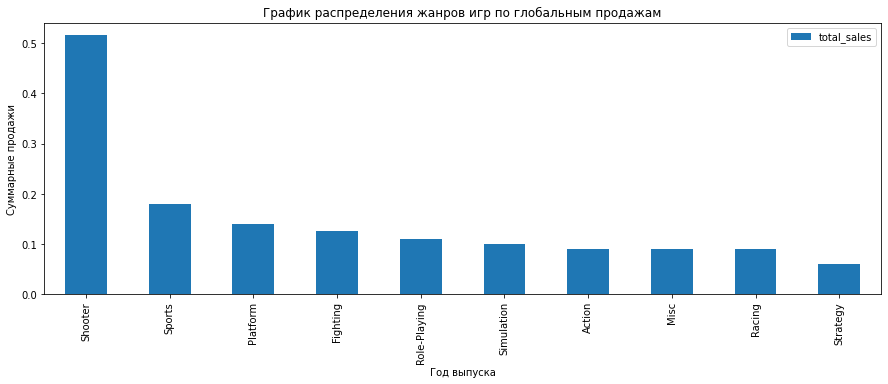

In [114]:
actual_games.groupby(by='genre').agg({'total_sales':'median'}).sort_values(by='total_sales', ascending=False).head(10).plot(kind='bar',figsize=(15,5))
plt.title('График распределения жанров игр по глобальным продажам')
plt.ylabel('Суммарные продажи')
plt.xlabel('Год выпуска')
plt.show()

- самый прибыльный жанр c большим отрывом - shooter.
- в топ-3 жанров входит sports и platform games.
- в топ-10 также входят игры жанров: fighting, role-playing, simulation, action, misc, racing, strategy


## 3.8. Портрет пользователя каждого региона
<a id="regions"></a>

На данном этапе определим для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишем различия в долях продаж.
- Самые популярные жанры (топ-5). Поясним разницу.
- Рассмотрим влияет ли рейтинг ESRB на продажи в отдельном регионе?

### Топ платформ для каждого региона

Рассмотрим популярные платформы для каждого региона, начнем с Северной Америки.

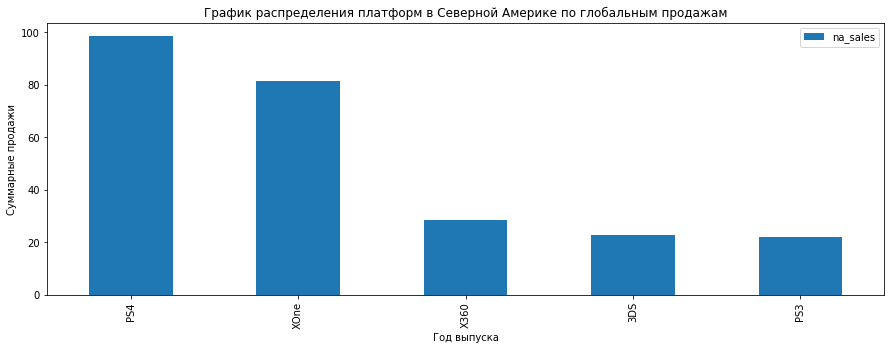

In [58]:
actual_games.groupby(by='platform').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar',figsize=(15,5))
plt.title('График распределения платформ в Северной Америке по глобальным продажам')
plt.ylabel('Суммарные продажи')
plt.xlabel('Год выпуска')
plt.show()

Итак,
- на первом месте по продажам в Северной Америке платформа PS4
- на втором месте XOne
- на третьем месте X360 с большим отрывом от XOne, далее 3DS и PS3 .

Рассмотрим популярные платформы для Европы.

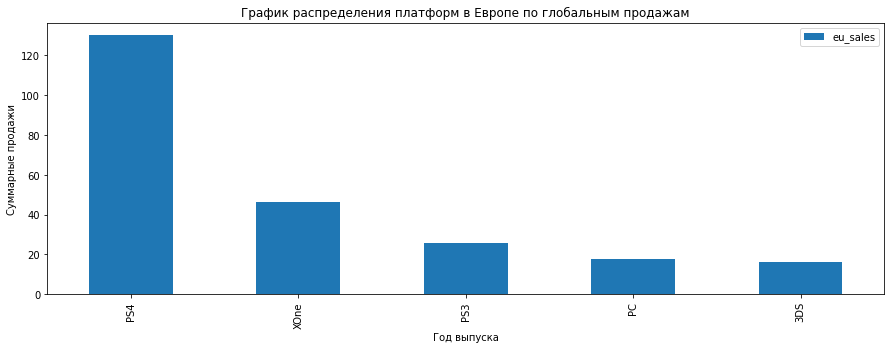

In [99]:
actual_games.groupby(by='platform').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar',figsize=(15,5))
plt.title('График распределения платформ в Европе по глобальным продажам')
plt.ylabel('Суммарные продажи')
plt.xlabel('Год выпуска')
plt.show()

В Европе 
- на первом месте также, как и в Северной Америке, но с большим отрывом платформа PS4.
- на втором месте также XOne, как и в Северной Америке
- на третьем PS3, далее PC и 3DS 

Рассмотрим популярные платформы в Японии.

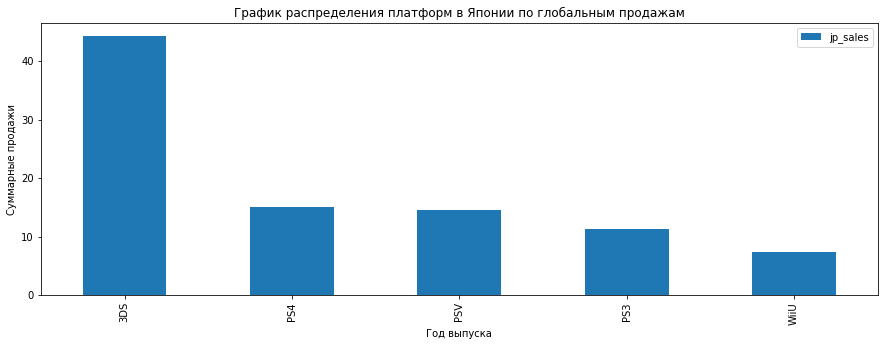

In [100]:
actual_games.groupby(by='platform').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar',figsize=(15,5))
plt.title('График распределения платформ в Японии по глобальным продажам')
plt.ylabel('Суммарные продажи')
plt.xlabel('Год выпуска')
plt.show()

В Японии
- на первом месте платформа 3DS с большим отрывом от второго места.
- примерно на одинаковом уровне по продажам на втором месте PS4, на третьем месте PSV
- далее PS3 и WiiU.

Сделаем вывод о пользователей в различных регионах:
- в Северной Америке и в Европе очень схожие предпочтения, в Японии портрет пользователя значительно отличается.
- в Северной Америке, как и в Европе самая топовая платформа - PS4, на втором месте XOne.
- в Японии самая популярная платформа - 3DS, на втором месте PS4.
- как в Северной Америке, так и в Европе популярны 3DS, PS3.
- в Японии популярны PSV, WiiU и также PS3.


### Топ-5 жанров для каждого региона

Построим графики популярных жанров для каждого региона, начнем с Северной Америки.

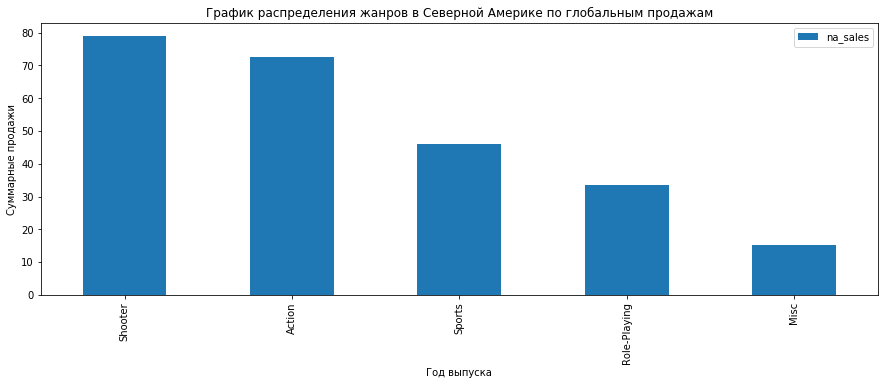

In [61]:
actual_games.groupby(by='genre').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar',figsize=(15,5))
plt.title('График распределения жанров в Северной Америке по глобальным продажам')
plt.ylabel('Суммарные продажи')
plt.xlabel('Год выпуска')
plt.show()

Судя по графику жанров в Северной Америке:
- самые популярный жанр - это shooter.
- в тройку популярных жанров также входит action и sports. 
- также пользуются популярностью Role-playing и Misc.

Рассмотрим топ жанров в Европе.

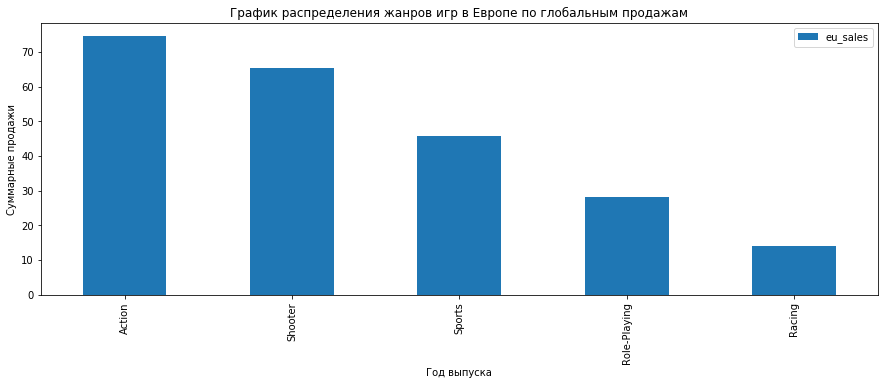

In [62]:
actual_games.groupby(by='genre').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar',figsize=(15,5))
plt.title('График распределения жанров игр в Европе по глобальным продажам')
plt.ylabel('Суммарные продажи')
plt.xlabel('Год выпуска')
plt.show()

Судя по графику жанров в Европе :
- распределение жанров в Европе и Северной Америке очень схожи.
- самые популярный жанр - это action.
- в тройку популярных жанров также, как и в Cеверном Америке входит shooter и sports. 
- также пользуются популярностью Role-playing, как и в Северной Америке.
- в пятерку популярных жанров в Европе входит racing, вместо жанра misc.

Рассмотрим топ жанров в Японии.

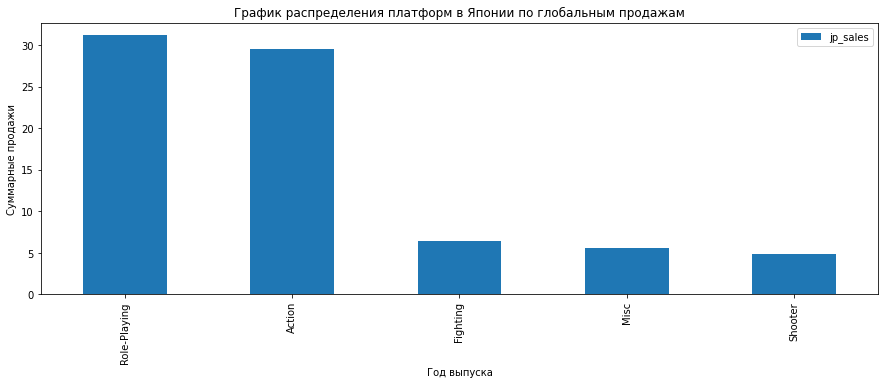

In [135]:
actual_games.groupby(by='genre').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar',figsize=(15,5))
plt.title('График распределения платформ в Японии по глобальным продажам')
plt.ylabel('Суммарные продажи')
plt.xlabel('Год выпуска')
plt.show()

Судя по распределению жанров в Японии :
- предпочтения к жанрам значительно отличается от Северной Америки и Европы.
- cамый популярный жанр - Role-Playing, который в других регионах не входит в топ-3.
- чуть менее популярен жанр Action, который также обладает большой популярностью в других регионах
- в пятерку популярных жанров входит shooter, который более популярен в других регионах, fighting и misc

Рассмотрев все распределения жанров в трех регионах, можно сказать, что
- в Северной Америке и в Европе жанровые предпочтения во многом очень схожи.
- В Японии предпочтения к жанрам немного отличается.

### Влияние рейтинга на продажи в регионах

Рассмотрим влияние рейтинга на продажи в регионах. Исключим из данных строки без рейтинга.

Построим диаграмму с влиянием рейтинга на продажи в Северной Америке.

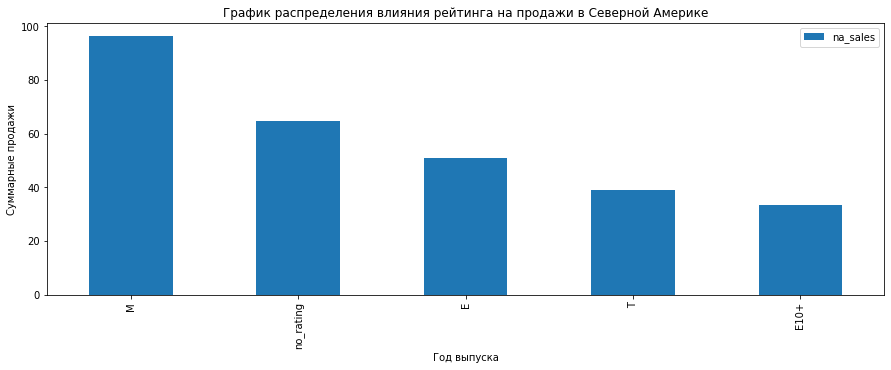

In [65]:
actual_games.groupby(by='rating').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar',figsize=(15,5))
plt.title('График распределения влияния рейтинга на продажи в Северной Америке')
plt.ylabel('Суммарные продажи')
plt.xlabel('Год выпуска')
plt.show()

- Самые продаваемые игры в Северной Америке с M-рейтингом для взрослых. 
- На втором месте в списке игры без рейтинга. 
- Далее игры с E-рейтингом («Everyone») — «Для всех». Содержание вполне подходит для возрастной категории от 6 лет. Такие игры могут понравиться и взрослым. 
- Также в продажах популярны игры с T-рейтингом для подростков.
- На пятом месте E10+ - игры для всех от 10 лет и старше и на пятом игры EC для детей младшего возраста. 

Построим диаграмму с влиянием рейтинга на продажи в Европе.

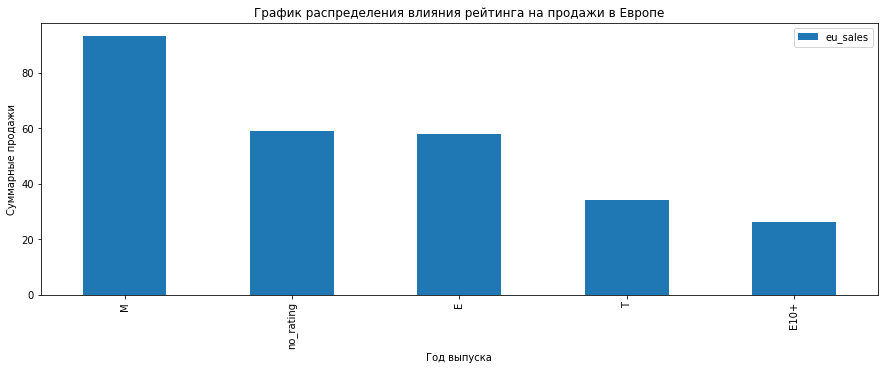

In [66]:
actual_games.groupby(by='rating').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar',figsize=(15,5))
plt.title('График распределения влияния рейтинга на продажи в Европе')
plt.ylabel('Суммарные продажи')
plt.xlabel('Год выпуска')
plt.show()

- распределение влияния рейтинга на продажи в Европе очень схоже с распределением Северной Америки
- игр с рейтингом E в Европе больше, чем в Cеверной Америке

Построим диаграмму с влиянием рейтинга на продажи в Японии.

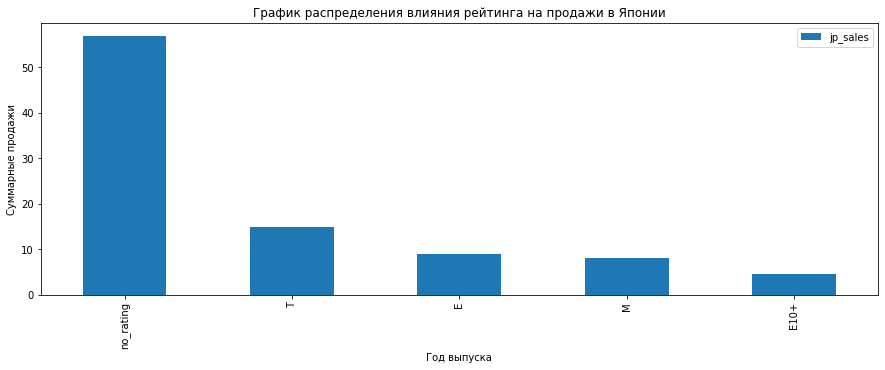

In [67]:
actual_games.groupby(by='rating').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar',figsize=(15,5))
plt.title('График распределения влияния рейтинга на продажи в Японии')
plt.ylabel('Суммарные продажи')
plt.xlabel('Год выпуска')
plt.show()

- распределение рейтинга в Японии отличается от распределения других стран.
- в график распределения Японии входят те же рейтинги, что и в других странах, но различается порядок их распределения.
- самые продаваемые игры в Японии без рейтинга.
- на втором месте игры с T-рейтингом для подростков.
- на третьем иесте игры с E-рейтингом («Everyone») — «Для всех».
- далее игры с М-рейтингом для взрослых. 
- на пятом месте, как и в других регионах E10+ - игры для всех от 10 лет и старше.

Рассмотрев графики распределения влияния рейтинга на продажи в различных регионах, можно сделать вывод о том, что
- Влияние рейтинга на продажи в Северной Америке и в Европе примерно одинаковое.
- Самые продаваемые игры в Северной Америке и Европе с M-рейтингом для взрослых. На втором месте в списке игры без рейтинга. Далее игры с E-рейтингом («Everyone») — «Для всех». Также в продажах популярны игры с T-рейтингом для подростков. На пятом месте E10+ - игры для всех от 10 лет и старше и на пятом игры EC для детей младшего возраста.
- В Японии влияние рейтинга немного отличается. Самые продаваемые игры в Японии без рейтинга, на втором месте игры с T-рейтингом для подростков, далее с E-рейтингом («Everyone») — «Для всех», затем с М-рейтингом для взрослых. На пятом месте, как и в других регионах E10+ - игры для всех от 10 лет и старше.

## Вывод

В результате исследовательского анализа данных:
- Посмотрели, сколько игр выпускалось в разные годы. И выяснили, что с 1980 по 1994 год игровая индустрия почти не развивалась. С 1995 года началось постепенное увеличение выпущенных игр. На 2009-2010 годы приходится пик выпуска игр. Далее игровая индустрия сбавила обороты.
- Рассмотрели, как менялись продажи по платформам. И выявили, что средний срок жизнедеятельности платформы 9 лет.
- Определили и взяли данные за актуальный период с 2014 по 2016 год.
- Определили что платформа PS4 лидируют по продажам. Выбрали потенциально прибыльные платформы на следующий 2017 год: PS4 и XOne.
- Построили график «ящик с усами» по глобальным продажам игр в разбивке по платформам.
- Разобрали, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.
- Построли диаграмму рассеяния и посчитали корреляцию между отзывами и продажами. Соотнесли выводы с продажами игр на других платформах. Сформулировали выводы, что корреляция оценок критиков и пользователей низкая.
- Посмотрели на общее распределение игр по жанрам. И выяснили, что самый прибыльный жанр - shooter.
- Изучили портрет пользователя для трех регионов - Северной Америки, Европы и Японии. Выявили, что пользователи Северной Америки и Европы очень схожи. Пользователи Японии отличаются от других регионов.

## Шаг 4. Проверка гипотез
<a id="hypothesis"></a>

Cформулируем нулевую и альтернативную гипотезу.

H0: средний пользовательский рейтинг платформ Xbox One и PS одинаковый

H1: средний пользовательский рейтинг платформ Xbox One и PS различается

In [68]:
xbox = games[(games['platform']=='XOne')&(games['user_score'] > 0)]['user_score']
pc = games[(games['platform']=='PC')&(games['user_score'] > 0)]['user_score']
alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(xbox, pc)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотез")

p-значение: 1.3896435533548819e-05
Отвергаем нулевую гипотезу


Нулевая гипотеза отвергнута, это дает основание полагать, что средний пользовательский рейтинг платформ Xbox One и PS различается.

Проверим вторую гипотезу. Cформулируем нулевую и альтернативную гипотезу.

H0: средний пользовательский рейтинг жанров Action и Sports одинаковый

H1: средний пользовательский рейтинг жанров Action и Sports различается

In [69]:
action = games[(games['genre'] == 'Action') & (games['user_score'] > 0)]['user_score']
sports = games[(games['genre'] == 'Sports') & (games['user_score'] > 0)]['user_score']
alpha = .05 # критический уровень статистической значимости
results = st.ttest_ind(action, sports)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.10406951359049141
Не получилось отвергнуть нулевую гипотезу


Не получилось отвергнуть нулевую гипотезу, это дает основание полагать, что средний пользовательский рейтинг жанров Action и Sports одинаковый.

# Вывод
<a id="conclusion"></a>

В результате проектной работы: 
- Подготовили данные для анализа - привели столбцы к нижнему регистру, заполнили пропуски, преобразовали данные к нужным типам, посчитали суммарные продажи во всех регионах.
- Провели исследовательский анализ данных.
- Выявили, что с 1980 по 1994 год игровая индустрия почти не развивалась. С 1995 года началось постепенное увеличение выпущенных игр. На 2009-2010 годы приходится пик выпуска игр. Далее игровая индустрия сбавила обороты. 
- Обнаружили, что примерно за 9 лет появляются новые и исчезают старые платформы.
- Актуализировали данные, взяли период с 2014 по 2016 год.
- Определили лидера продажа среди платформенных игр и выяснили, что перспективные и прибыльные платформы PS4 и XOne.
- Рассмотрели влияние отзывов на продажи. Узнали, что отызвы слабо влияют на продажи. 
- Установили, что самый прибыльный жанр среди игр - shooter, также в топ-3 жанров входит sports и platform games.
- Увидели, что в регионах различные лидеры по продажам среди платформ. В Северной Америке самая топовая платформа - X-360, в Европе - PS3, в Японии DS. Также во всех регионах популярны Wii, PS4, 3DS, PSP.
- Узнали, что в Северной Америке и в Европе жанровые предпочтения очень схожи. Самый популярный жанр action, затем sports, shooter и musc. В Японии предпочтения к жанрам немного отличается. Cамый продаваемый жанр role-playing.
- Выяснили, что самые популярные платформмы в Северной Америке и в Европе - PS4 и XOne. В Японии - 3DS и PS4. Описали различия в долях продаж.
- Определили самые популярные жанры (топ-5) в регионах. Обнаружили, что в Северной Америке и в Европе жанровые предпочтения во многом очень схожи. Самый популярные жанры это action, sports, shooter. В Японии предпочтения к жанрам немного отличается. Cамый продаваемый жанр role-playing. Таже в Японии популярны, как и в других регионах игры жанра action. Пояснили разницу.
- Определили влияет ли рейтинг ESRB на продажи в отдельном регионе? Выяснили, что влияние рейтинга на продажи в Северной Америке и в Европе примерно одинаковое. Самые продаваемые игры в Северной Америке и Европе с M-рейтингом для взрослых. На втором месте в списке игры без рейтинга. Далее игры с E-рейтингом («Everyone») — «Для всех». Также в продажах популярны игры с T-рейтингом для подростков. На пятом месте E10+ - игры для всех от 10 лет и старше и на пятом игры EC для детей младшего возраста. В Японии влияние рейтинга немного отличается. Самые продаваемые игры в Японии, без рейтинга, на втором месте игры с T-рейтингом для подростков, далее с E-рейтингом («Everyone») — «Для всех», затем с М-рейтингом для взрослых. На пятом месте, как и в других регионах E10+ - игры для всех от 10 лет и старше.
- Проверили гипотезы и предположили, что средний пользовательский рейтинг платформ Xbox One и PS различается, о средний пользовательский рейтинг жанров Action и Sports одинаковый.